# 1 자료형 변환하기
* DataFrame객체(또는 Series객체).<b>`astype('새로운데이터타입이름')`</b>

* seaborn의 'tips' 데이터셋을 이용하여 자료형 변환을 해본다.

In [186]:
# 판다스와 seaborn 라이브러를 임포트한다.

import pandas as pd
import seaborn as sns

In [187]:
# seaborn의 'tips'데이터셋을 로드하고 데이터프레임 tips를 생성한다.

tips = sns.load_dataset('tips')

In [188]:
# 데이터프레임 tips의 앞쪽 데이터를 확인

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [189]:
# tips의 행열확인

tips.shape

(244, 7)

In [190]:
# tips 각 열의 데이터 타입 확인

tips.dtypes   # category(범주형): 모든 문자열X, 범위를 지정해놓은(정해진 범주 안의) 몇 가지만 해당 컬럼에 들어갈 수 있음

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [191]:
# tips의 요약정보확인

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [192]:
tips['sex']

0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']

In [193]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [194]:
tips['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [195]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [196]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [197]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [198]:
tips['day'][0] = 'Sat'  # 0번째 행만 데이터 바꾸기
tips['day']

0       Sat
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [199]:
# 흡연여부를 나타내는 smoker열은 카테고리형이다. 이열을 문자열로 바꾸고 'smoker_str'열을 생성한다.

tips['smoker_str'] = tips['smoker'].astype('str') #asytpe('타입의 이름'): ()안의 타입으로 type 바꾸기 #새로운 타입으로 바꿀때 쓰는 메소드

In [200]:
tips.dtypes #'smoker'열 자체가 문자열로 바뀐 것은 아님

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
smoker_str      object
dtype: object

In [201]:
# tips의 각 열의데이터 타입을 확인

tips.dtypes  #'smoker_str'열이 만들어지고, object(문자열)이 들어감
             # 원래의 'smoker'컬럼은 category 그대로 남아있음

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
smoker_str      object
dtype: object

In [202]:
# 'total_bill'열의 데이터형을 문자열로 변환

tips['total_bill'] = tips['total_bill'].astype('str') #float-->object로 바꾸기, 'total_bill'열 자체가 바뀌는 것은 아님

In [203]:
# tips의 각 열의데이터 타입을 확인

tips.dtypes  # 타입 변환 결과를 다시 'total_bill'컬럼에 대입해야 컬럼 자체가 바뀜

total_bill      object
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
smoker_str      object
dtype: object

In [204]:
# 'total_bill'열의 데이터형을 실수형으로 변환

tips['total_bill'] = tips['total_bill'].astype('float') #object-->float, 
                                                        #'total_bill'컬럼 자체가 바뀐 것은 아니므로, 다시 대입해야 컬럼 자체가 바뀜

In [205]:
# tips의 각 열의데이터 타입을 확인

tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
smoker_str      object
dtype: object

# 2 데이터프레임 열분리
 <b>`시리즈의 문자열 리스트 인덱싱 : 시리즈객체.str.get(인덱스)`</b>

- <u>하나의 열이 여러 가지 정보를 담고 있을 때 각 정보를 서로 분리해서 사용하는 경우</u>가 있다.
- 어떤 열에 '연월일' 정보가 있을때 '연', '월', '일'을 구분하여 3개의 열을 만드는 것이나, 사람의 이름이 들어 있는 열을 '성'과 '이름'을로 구분하는 것을 예로 들수 있다.

* '주가데이터.xlsx'파일(한국 주식시장에 상장된 모 회사의 날짜별 주가를 정리한 데이터)의 날짜데이터를 연,월,일로 분리해본다.

In [206]:
# 판다스 라이브러리 임포트

import pandas as pd

In [207]:
# './data/주가데이터.xlsx'파일을 읽어봐 데이터프레임 df를 생성한다.

df = pd.read_excel('/content/drive/MyDrive/창의적프로그래밍/Week09/data/주가데이터.xlsx')
df

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039
5,2018-06-25,11150,150,11400,11450,11000,55519
6,2018-06-22,11300,100,11250,11450,10750,134805
7,2018-06-21,11200,350,11350,11750,11200,133002
8,2018-06-20,11550,250,11200,11600,10900,308596
9,2018-06-19,11300,700,11850,11950,11300,180656


In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
# 데이터프레임 df의 요약 정보를 확인

df.info() #datetime 타입: 날짜/시간 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연월일     20 non-null     datetime64[ns]
 1   당일종가    20 non-null     int64         
 2   전일종가    20 non-null     int64         
 3   시가      20 non-null     int64         
 4   고가      20 non-null     int64         
 5   저가      20 non-null     int64         
 6   거래량     20 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 1.2 KB


## 2.1 Series.str 
- <b>`시리즈의 값을 문자열로 접근하기 위해 사용되는 속성`</b>

* '연월일' 열의 내용을 분리해 '연','월','일' 3개의 열을 생성한다.

In [210]:
# 문자열 메소드를 사용하기 위해 '연월일' 열의 자료형을 변경한다.
# 결과를 '연월일_str' 컬럼에 대입한다.

df['연월일_str'] = df['연월일'].astype('str') #datetime-->object(문자열 처리), 
                                              #'연월일' 열 자체가 문자열로 바뀌지는 X(결과만 보여줌), 결과를 '연월일_str' 컬럼에 대입

In [211]:
# df의 요약정보확인

df.info() #'연월일'컬럼(datattime 타입) 그대로, '연월일_str'컬럼(문자열 타입) 생성

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연월일      20 non-null     datetime64[ns]
 1   당일종가     20 non-null     int64         
 2   전일종가     20 non-null     int64         
 3   시가       20 non-null     int64         
 4   고가       20 non-null     int64         
 5   저가       20 non-null     int64         
 6   거래량      20 non-null     int64         
 7   연월일_str  20 non-null     object        
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 1.4+ KB


In [212]:
df['연월일_str'] #전체는 index,value(data)로 구성된 Series, 항목 하나하나는 object(문자열)

0     2018-07-02
1     2018-06-29
2     2018-06-28
3     2018-06-27
4     2018-06-26
5     2018-06-25
6     2018-06-22
7     2018-06-21
8     2018-06-20
9     2018-06-19
10    2018-06-18
11    2018-06-15
12    2018-06-14
13    2018-06-12
14    2018-06-11
15    2018-06-08
16    2018-06-07
17    2018-06-05
18    2018-06-04
19    2018-06-01
Name: 연월일_str, dtype: object

In [213]:
type(df['연월일_str'][1]) #전체 시리즈, 항목 문자열

str

In [214]:
'홍 길 동'.split()[2] #문자열 객체
                      #split()메소드: 쪼개라/나눠라,(빈칸)을 기준으로, 결과(문자열 3개)를 리스트로 만듦

'동'

In [215]:
'2022 04 27'.split()[2] #(space) 기준으로 쪼개라

'27'

In [216]:
'2022-04-27'.split('-')[2] #('-')하이픈 기준으로 쪼개라

'27'

In [217]:
# '연월일_str' 열의 문자열데이터를 split() 메소드로 분리하여 ['연','월', '일'] 형태의 리스트로 정리해서 dates변수에 대입

dates = df['연월일_str'].str.split('-') #str: 시리즈가 가진 전체 '문자열데이터'에 접근할 수 있음(0~19번째까지) #반복문 필요없음
dates                                   #쪼갠 결과는 시리즈-->'연','월','일' 각각의 데이터에 접근하려면 또다시 str
                                        #df['연월일_str'].str.split('-')[0][0]: 시리즈의 0번째 데이터의 '연'정보('2018') 

0     [2018, 07, 02]
1     [2018, 06, 29]
2     [2018, 06, 28]
3     [2018, 06, 27]
4     [2018, 06, 26]
5     [2018, 06, 25]
6     [2018, 06, 22]
7     [2018, 06, 21]
8     [2018, 06, 20]
9     [2018, 06, 19]
10    [2018, 06, 18]
11    [2018, 06, 15]
12    [2018, 06, 14]
13    [2018, 06, 12]
14    [2018, 06, 11]
15    [2018, 06, 08]
16    [2018, 06, 07]
17    [2018, 06, 05]
18    [2018, 06, 04]
19    [2018, 06, 01]
Name: 연월일_str, dtype: object

In [218]:
# 분리된 정보를 각각 새로운 열에 담아 df에 추가하기
# dates에서 연정보를 추출하여 '연_str'컬럼에 대입

df['연_str'] = dates.str[0] #dates는 쪼개진 문자열리스트를 가진 '시리즈', str로 시리즈의 '문자열데이터'에 접근: ['연','월','일']
                            #df['연월일_str'].str.split('-').str의 '연'데이터에 접근

In [219]:
# 분리된 정보를 각각 새로운 열에 담아 df에 추가하기
# dates에서 월정보를 추출하여 '월_str'컬럼에 대입

df['월_str'] = dates.str[1] #dates 시리즈, str로 전체 문자열데이터에 접근, '월'정보에 접근 
                            #0 [2018, 07, 02], [2018, 07, 02], 0 07

In [220]:
# 분리된 정보를 각각 새로운 열에 담아 df에 추가하기
# dates에서 일정보를 추출하여 '일_str'컬럼에 대입

df['일_str'] = dates.str[2]

In [221]:
# df확인

df #연월일(datetime) vs 연월일_str(object문자열) #연_str(연정보), 월_str(월정보), 일_str(일정보)만 뽑은 새로운 컬럼 생성

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연월일_str,연_str,월_str,일_str
0,2018-07-02,10100,600,10850,10900,10000,137977,2018-07-02,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018-06-29,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018-06-28,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018-06-27,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018-06-26,2018,06,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018-06-25,2018,06,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018-06-22,2018,06,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018-06-21,2018,06,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018-06-20,2018,06,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018-06-19,2018,06,19


In [222]:
#df['연월일_str'].str.split('-').str[0]   #문자열데이터 가진 시리즈#문자열데이터접근#('-')기준으로 쪼갠 문자열리스트 가진 시리즈
df['연월일_str'].str.split('-').str.get(0)   #문자열데이터접근 #연/월/일 정보 추출 str[] or get()

0     2018
1     2018
2     2018
3     2018
4     2018
5     2018
6     2018
7     2018
8     2018
9     2018
10    2018
11    2018
12    2018
13    2018
14    2018
15    2018
16    2018
17    2018
18    2018
19    2018
Name: 연월일_str, dtype: object

## 2.2 Series.dt
- <b>`시리즈의 값을 datetime으로 접근하기 위해 사용되는 속성`</b>
- 시리즈객체.dt.year
- 시리즈객체.dt.month
- 시리즈객체.dt.day

In [223]:
# datetime타입인 '연월일' 열에서 연도를 추출하여 '연_int' 열을 생성한다.

df['연_int'] = df['연월일'].dt.year #.dt: datetime타입 시리즈의 '날짜시간정보데이터(datetime)'에 접근할 수 있다 
                                    # 문자열데이터 시리즈에는 .str 통해 접근
                                    #.year: 시리즈의 모든 항목을 뒤져 '연도'만 찾음(0~마지막까지)

In [224]:
# datetime타입인 '연월일' 열에서 월을 추출하여 '월_int' 열을 생성한다.

df['월_int'] = df['연월일'].dt.month #날짜시간데이터 가진 시리즈, dt로 시리즈 각각의 날짜시간정보에 접근, month로 연정보에 접근

In [225]:
# datetime타입인 '연월일' 열에서 일을 추출하여 '일_int' 열을 생성한다.

df['일_int'] = df['연월일'].dt.day

In [226]:
# df확인

df

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연월일_str,연_str,월_str,일_str,연_int,월_int,일_int
0,2018-07-02,10100,600,10850,10900,10000,137977,2018-07-02,2018,07,02,2018,7,2
1,2018-06-29,10700,300,10550,10900,9990,170253,2018-06-29,2018,06,29,2018,6,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018-06-28,2018,06,28,2018,6,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018-06-27,2018,06,27,2018,6,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018-06-26,2018,06,26,2018,6,26
5,2018-06-25,11150,150,11400,11450,11000,55519,2018-06-25,2018,06,25,2018,6,25
6,2018-06-22,11300,100,11250,11450,10750,134805,2018-06-22,2018,06,22,2018,6,22
7,2018-06-21,11200,350,11350,11750,11200,133002,2018-06-21,2018,06,21,2018,6,21
8,2018-06-20,11550,250,11200,11600,10900,308596,2018-06-20,2018,06,20,2018,6,20
9,2018-06-19,11300,700,11850,11950,11300,180656,2018-06-19,2018,06,19,2018,6,19


In [227]:
# 최종 데이터프레임 df의 요약정보를 확인한다.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연월일      20 non-null     datetime64[ns]
 1   당일종가     20 non-null     int64         
 2   전일종가     20 non-null     int64         
 3   시가       20 non-null     int64         
 4   고가       20 non-null     int64         
 5   저가       20 non-null     int64         
 6   거래량      20 non-null     int64         
 7   연월일_str  20 non-null     object        
 8   연_str    20 non-null     object        
 9   월_str    20 non-null     object        
 10  일_str    20 non-null     object        
 11  연_int    20 non-null     int64         
 12  월_int    20 non-null     int64         
 13  일_int    20 non-null     int64         
dtypes: datetime64[ns](1), int64(9), object(4)
memory usage: 2.3+ KB


# 3 그룹 연산

- 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나눠서 관찰하는 것은 좋은 방법이다. 이처럼 <b><u>특정 기준을 적용하여 몇 개의 그룹으로 분할 하여 처리하는 것을 그룹 연산</u></b>이라고 한다.
- 특히 <b><u>그룹 연산은 데이터를 집계, 변환, 필터링 하는데 효율적</u></b>이다.
- 3단계의 과정으로 이루어지고, 데이터를 그룹으로 분할하는 1단계 과정을 판다스 <b><u>`groupby() 메소드`</u></b>를 사용한다.

> 1단계) <b>분할(split)</b>: 데이터를 특정 조건에 의해 분할                   
> 2단계) <b>적용(apply)</b>: 데이터를 집계, 변환, 필터링하는데 필요한 메소드 적용  
> 3단계) <b>결합(combine)</b>: 2단계의 처리 결과를 하나로 결합

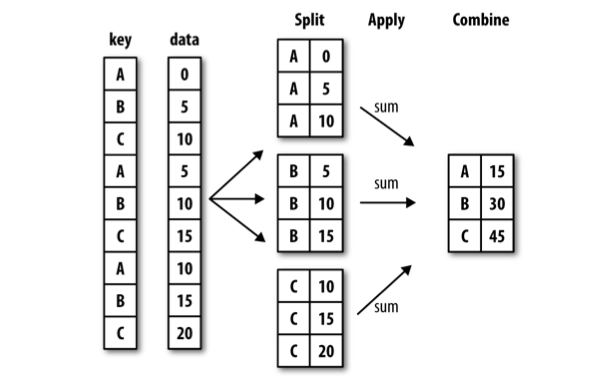

In [228]:
# 판다스 임포트

import pandas as pd

In [229]:
# 데이터프레임을 생성하고 df에 대입

df = pd.DataFrame({'key':['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'data':[0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


* key 값을 기준으로 그루핑하여 data의 합 구하기1
> key 값대로 필터링한후 sum() 함수 적용하면됨

In [230]:
# 'key'열의 고유값 확인

df['key'].unique() #df['key'].value_counts()

array(['A', 'B', 'C'], dtype=object)

* key값이 'A', 'B', 'C' 세 개가 있고 각각의 키 값에 대해 불린 인덱싱 후 sum() 메소드 적용

In [231]:
# key 값이 'A'인 데이터를 필터링하고 합구하기

df.loc[df['key'] == 'A'].sum() #loc[]: 행 찾기 #sum(): 각각의 컬럼별로 합하기, 문자는 연결, 숫자는 더함
#df.loc[df['key'] == 'A']['data'].sum() #'data'컬럼만 뽑아서 합하기

key     AAA
data     15
dtype: object

In [232]:
# key 값이 'B'인 데이터를 필터링하고 합구하기

df.loc[df['key'] == 'B'].sum()

key     BBB
data     30
dtype: object

In [233]:
# key 값이 'C'인 데이터를 필터링하고 합구하기

df.loc[df['key'] == 'C'].sum()

key     CCC
data     45
dtype: object

* key 값을 기준으로 그루핑하여 data의 합 구하기2
> groupby() 메소드 사용

In [234]:
# step1) 분할
# 분할된 결과를 df_key변수에 대입

df_key = df.groupby('key') #('key')컬럼의 고유값을 기준으로 그루핑
df_key #groupby객체

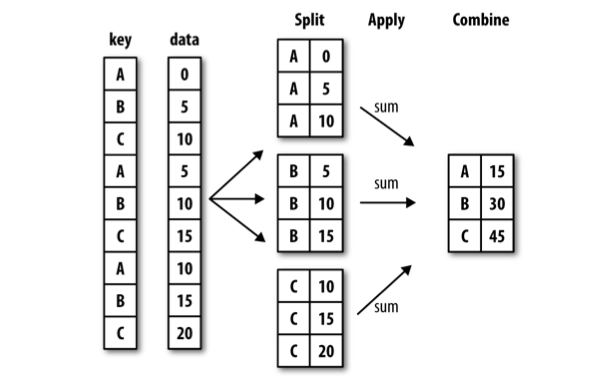

In [235]:
# 'key'를 기준으로 분할된  df_key내용 확인

for key, group in df_key: #df_key의 두 변수이름: key('A','B','C'), group(그루핑 된 것들(쪼개진 그룹들)) #파이썬 반복문(몰라도됨)
  print('[key] :', key)
  print('[개수] :', len(group)) #group의 record개수
  print(group)

[key] : A
[개수] : 3
  key  data
0   A     0
3   A     5
6   A    10
[key] : B
[개수] : 3
  key  data
1   B     5
4   B    10
7   B    15
[key] : C
[개수] : 3
  key  data
2   C    10
5   C    15
8   C    20


In [236]:
# step 2, 3) 적용및 결합

df_key.sum() #각각의 그룹의 합

,data
key,
A,15
B,30
C,45


In [237]:
# step 1, 2, 3)을 한꺼번에 적용하기

df.groupby('key').sum() #raw(원시데이터), ('key')값을 기준으로 그루핑, 각각의 그룹의 합[집계]
                        # .mean() 평균, .max() 최대값 [집계]

,data
key,
A,15
B,30
C,45


## 3.1 그룹객체 만들기(분할 단계)


### 3.1.1 1개 열을 기준으로 그룹화

데이터프레임객체.<b>`groupby(기준이 되는 열)`</b>

- <u>groupby() 메소드는 데이터프레임의 특정 열을 기준으로 데이터프레임을 분할하여 그룹 객체를 반환</u>한다.
- 기준이 되는 열은 1개도 가능하고, 여러 열을 리스트로 입력할 수도 있다.

* seaborn의 'titanic' 데이터셋에서 'class'열을 기준으로하여 그룹으로 나눈다.

In [238]:
# 라이브러리 불러오기

import pandas as pd
import seaborn as sns

In [239]:
# titanic데이터셋 불러오기, 변수 titanic에 대입

titanic = sns.load_dataset('titanic')

In [240]:
# titanic 데이터프레임의 처음 5개 행 확인

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [241]:
# titanic 데이터프레임의 요약정보 확인

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [242]:
# 'class'열의 고유데이터와 개수 확인

titanic['class'].value_counts() #titanic['class']까지하면 카테고리형(범주형)인 것 알 수 있음(몇개 안들어감)

Third     491
First     216
Second    184
Name: class, dtype: int64

In [243]:
# titanic  데이터셋에서 age, sex, class, fare, survived 열을 선택하여 데이터 프레임 df만들기

df = titanic[['age', 'sex', 'class', 'fare', 'survived']].copy() #[]: 컬럼 선택, 여러개는 리스트 #.copy(): 복사
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [244]:
# class 열을 기준으로 분할
# 분할된 결과를 grouped 변수에 대입한다.

grouped = df.groupby('class') #('class')의 고유값을 기준으로 그루핑: 'first', 'second', 'third'에 각각의 정보들(age, sex, class, fare, survived)
grouped

In [245]:
# 'class' 열에는 'First', 'Second', 'Third'라는 3개의 값이 들어있다.
# 이 3개의 값을 기준으로 891명의 승객 데이터가 3개의 그룹으로 나뉘어진다.
# 반복문을 이용하여 그룹객체(grouped)의 내용을 출력해서 세개의 그룹이 어떻게 구성되어 있는지 확인한다.

for key, group in grouped: #key:First, Second, Third, group:그루핑(분할)된 것들(각각의 정보들)
  print('[key] :', key)
  print('[개수] :', len(group)) #group의 record 개수(f.s.t에 해당되는 정보의 개수)
  print(group)

[key] : First
[개수] : 216
      age     sex  class     fare  survived
1    38.0  female  First  71.2833         1
3    35.0  female  First  53.1000         1
6    54.0    male  First  51.8625         0
11   58.0  female  First  26.5500         1
23   28.0    male  First  35.5000         1
..    ...     ...    ...      ...       ...
871  47.0  female  First  52.5542         1
872  33.0    male  First   5.0000         0
879  56.0  female  First  83.1583         1
887  19.0  female  First  30.0000         1
889  26.0    male  First  30.0000         1

[216 rows x 5 columns]
[key] : Second
[개수] : 184
      age     sex   class     fare  survived
9    14.0  female  Second  30.0708         1
15   55.0  female  Second  16.0000         1
17    NaN    male  Second  13.0000         1
20   35.0    male  Second  26.0000         0
21   34.0    male  Second  13.0000         1
..    ...     ...     ...      ...       ...
866  27.0  female  Second  13.8583         1
874  28.0  female  Second  24.0000   

In [246]:
 # 3개의 그룹으로 나뉘어진 그룹객체(grouped)에 연산 메소드를 적용할 수 있다.
# grouped 객체에 들어 있는 3개 그룹에 대하여 그룹별 평균을 구하기 위하여 mean() 메소드를 적용한다.
# 이때 연산이 가능한 열에 대해서만 선택적으로 연산을 수행한다.

grouped.mean() #집계함수 적용 #mean(): 평균 구하기, 수치데이터만(문자열데이터X)

# 1 등석의 평균 나이가 38세로 가장 많고, 구조 확률도 63% 정도로 가장 높다는 정보를 얻을 수 있다.

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [247]:
# df를 'class'를 기준으로 그루핑하고 평균구하기
# class별로 평균구하기

df.groupby('class').mean() #한번에: raw데이터, ('class')의 고유값 기준으로 그루핑(정렬): 'First','Second','Third', 집계함수 적용

,age,fare,survived
class,,,
First,38.233441,84.154687,0.629630
Second,29.877630,20.662183,0.472826
Third,25.140620,13.675550,0.242363


In [248]:
# 그룹객체(grouped)에 get_group()메소드를 적용하면 특정 그룹만을 선택할 수 있다.
# grouped객체의 3개 그룹 중 'Third'인 3등석 승객 데이터를 가진 그룹을 따로 선택하여 추출한다.

df.groupby('class').get_group('Third') #get_group(): 원하는 그룹만 가져올 수 있음

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
2,26.0,female,Third,7.9250,1
4,35.0,male,Third,8.0500,0
5,NaN,male,Third,8.4583,0
7,2.0,male,Third,21.0750,0
...,...,...,...,...,...
882,22.0,female,Third,10.5167,0
884,25.0,male,Third,7.0500,0
885,39.0,female,Third,29.1250,0
888,NaN,female,Third,23.4500,0


In [249]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [250]:
df.groupby('sex').mean() #df.groupby('sex'): 'sex'를 기준으로 그루핑해주면 성별을 기준으로 '모든 컬럼'이 다 들어감(수치데이터)

,age,fare,survived
sex,,,
female,27.915709,44.479818,0.742038
male,30.726645,25.523893,0.188908


In [251]:
# 성별에 따른 평균 생존률
df.groupby('sex')[['age','survived']].mean() #원하는 컬럼 선택, 원하는 정보(평균값) #여러개,다중선택은 리스트[]

,age,survived
sex,,
female,27.915709,0.742038
male,30.726645,0.188908


### 3.1.2 여러 열을 기준으로 그룹화

데이터프레임객체.<b>`groupby(기준이되는 열의 리스트)`</b>

- 여러 개의 기준 값을 사용하기 때문에 반환되는 그룹 객체의 인덱스는 다중 구조를 갖는다.
- <u>groupby() 메소드에 기준이 되는 여러개의 열을 인자로 전달하면 여러 개의 열이 갖는 원소 값들로 만들 수 있는 모든 조합으로 키를 생성한다. 그리고 조합된 키를 기준으로 그룹 객체를 만든다.</u>

In [252]:
# 데이터프레임 df를 'class'열, 'sex'열을 기준으로 분할
# 'class'열에는 'First', 'Second', 'Third'라는 3개의 값이 들어 있고
# 'sex' 열에는 'male', 'female'의 2개의 값이 들어있다.
# 분할된 그룹의 가능한 조합은 ('class', 'sex')형식의 투플로 지정되는데, ('First', 'female')을 포함하여 6개의 키가 조합으로 만들어진다.
# 그루핑된 결과는 grouped_two 변수에 대입한다.

grouped_two = df.groupby(['class', 'sex']) #2개의 열을 기준으로 그루핑(리스트[]), 6(3X2)개의 조합
grouped_two

In [253]:
# grouped_two에 분할된 그룹 확인

for key, group in grouped_two:
  print('[key] :', key) #key값이 ('class', 'sex(성별)')로, 소괄호()안에 투플 형태로 들어감
  print('[개수] :', len(group)) #group의 record 길이(개수)
  print(group)

[key] : ('First', 'female')
[개수] : 94
      age     sex  class      fare  survived
1    38.0  female  First   71.2833         1
3    35.0  female  First   53.1000         1
11   58.0  female  First   26.5500         1
31    NaN  female  First  146.5208         1
52   49.0  female  First   76.7292         1
..    ...     ...    ...       ...       ...
856  45.0  female  First  164.8667         1
862  48.0  female  First   25.9292         1
871  47.0  female  First   52.5542         1
879  56.0  female  First   83.1583         1
887  19.0  female  First   30.0000         1

[94 rows x 5 columns]
[key] : ('First', 'male')
[개수] : 122
      age   sex  class      fare  survived
6    54.0  male  First   51.8625         0
23   28.0  male  First   35.5000         1
27   19.0  male  First  263.0000         0
30   40.0  male  First   27.7208         0
34   28.0  male  First   82.1708         0
..    ...   ...    ...       ...       ...
839   NaN  male  First   29.7000         1
857  51.0  male  F

In [254]:
# grouped_two 객체의 각 그룹에 mean()메소드를 적용한다.
# 이때 데이터프레임 객체가 반환되는데, 키가 되는 2개의 열('class', 'sex')의 값으로부터 2중 멀티인덱스가 지정된다.
# 결과를 average_two 변수에 대입한다.

average_two = grouped_two.mean() #여러 컬럼 기준으로 그루핑, 집계함수 적용
average_two                      #멀티인덱스: 인덱스가 두개 이상(<->단일인덱스)
                                 #            행(record),열에 접근하는 방법이 여러 개일 수 있다(원하는 데이터 찾아가는 방법)
                                 #행 접근 위해 female이 3개, 'class'라는 인덱스 추가해서 First female, Second female, Third female

# 여성의 생존율이 남성에 비해 월등히 높다.
# 다만, 3등석 여성 승객의 생존율은 50%에 불과하여, 1,2등석 여성 승객의 90%대 대비 상대적으로 낮다는 사실을 알 수 있다.

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [255]:
# averagge_two의 index확인

average_two.index #index(속성), 소괄호()가 붙어서 6개

MultiIndex([( 'First', 'female'),
            ( 'First',   'male'),
            ('Second', 'female'),
            ('Second',   'male'),
            ( 'Third', 'female'),
            ( 'Third',   'male')],
           names=['class', 'sex'])

In [256]:
# 'class'와 'sex'열을 기준으로 평균구하기

df.groupby(['class', 'sex']).mean() #전체 행, 그루핑 기준 2개(리스트[]), 집계
                                    #기준이 2개니까 접근할 수 있는 인덱스도 2개(멀티인덱스,행), 나머지 '컬럼들'의 평균도 나옴

age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

In [257]:
df.groupby(['class', 'sex'])['survived'].mean() #원하는 컬럼만 선택

class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64

In [258]:
# 멀티인덱스를 이용하여 특정 그룹만 추출할 수 있다.
# get_group()메소드를 활용하는데 인자로 전달하는 키는 투플로 입력한다.

df.groupby(['class', 'sex']).get_group(('Third', 'female')) #.get_group(): 원하는 그룹 선택, 인덱스 똑같이 투플로 줘야함
                                                            #인덱스 여러개(투플): 소괄호(index1, index2)로 묶임

,age,sex,class,fare,survived
2,26.0,female,Third,7.9250,1
8,27.0,female,Third,11.1333,1
10,4.0,female,Third,16.7000,1
14,14.0,female,Third,7.8542,0
18,31.0,female,Third,18.0000,0
...,...,...,...,...,...
863,NaN,female,Third,69.5500,0
875,15.0,female,Third,7.2250,1
882,22.0,female,Third,10.5167,0
885,39.0,female,Third,29.1250,0


## 3.2 그룹 연산 메소드(적용-결합단계)

### 3.2.1 데이터 집계

- <u>groupby() 메소드로 분할한 그룹 객체에 대하여 다양한 연산을 적용</u>할 수있다.
- 이 과정을 <u><b>데이터 집계(aggreagation)</b></u>이라고 한다.
- 집계 기능을 내장하고 있는 판다스 기본 함수에는 mean(), max(), min(), sum(), count(), size(), var(), std(), describe(), info(), first(), last() 등이 있다.

In [259]:
# df확인

df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [260]:
# 'class'열을 기준으로 분할하여 표준편차구하기

df.groupby('class').std() #표준편차:평균에서 얼마나 떨어져 있는가
                          #전체 열 선택, but .std()가 수치데이터만 처리 가능

# 1등석의 요금(fare)의 표준편차가 2,3등복다 훨씬 크다.

,age,fare,survived
class,,,
First,14.802856,78.380373,0.484026
Second,14.001077,13.417399,0.500623
Third,12.495398,11.778142,0.428949


In [261]:
# 각 그룹에 대한 'fare'열의 표준편차를 집계하여 시리즈로 반환

df.groupby('class')['fare'].std() #원하는 열만 선택

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

### 3.2.2 모든 열에 여러 함수를 매핑 : group 객체.agg(['함수1', '함수2', '함수3',...])
### 3.2.3 각 열마다 다른 함수를 매핑 : group 객체.agg({'열1':'함수1', '열2':'함수2', ...})

- <u>동시에 여러 개의 함수를 사용하여 각 그룹별 데이터에 대한 집계 연산을 처리</u>할 수 있다
- 각각의 열에 여러 개의 함수를 일괄 적용할 때는 리스트 형태로 인수를 전달하고, 열마다 다른 종류의 함수를 적용하려면 {열:함수}형태의 딕셔너리를 전달한다.

In [262]:
# 여러 함수를 각 열에 동일하게 적용하여 집계
# 각 열에 2개의 함수('min', 'max')를 일괄 적용하여 그룹별로 집계한다.

df.groupby('class').agg(['min', 'max']) #.agg(): aggregate(집계하다)의 약자 #집계함수 2개니까 리스트[]
                                        #문자열도 최대최소값 있음(알파벳순) 

age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1

In [263]:
df.groupby('class')[['age', 'fare']].agg(['min', 'max']) #의미 있는 열만 선택(여러 열 리스트[])

age       fare          
         min   max  min       max
class                            
First   0.92  80.0  0.0  512.3292
Second  0.67  70.0  0.0   73.5000
Third   0.42  74.0  0.0   69.5500

In [264]:
# 각 열마다 다른 함수를 적용하여 집계
# 'fare'열에는 2개의 함수('min', 'max')를 적용하고, 'age'열에는 다른 종류의 함수('mean')를 적용하여 집계한다.

df.groupby('class').agg({'fare':['min', 'max'], 'age':'mean'}) #.agg(): 모든 컬럼에 여러 함수 집계
                                                               #딕셔너리{'컬럼명': '함수'(여러개면 리스트[])}: 주면 컬럼마다 다른 집계함수 적용

fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620

In [265]:
#reshape 1)groupby()